# Raspberry ánalisis de datos 


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib.dates as mdates
from datetime import datetime 

Raspberry pi es un pequeño ordenador que tiene múltiples funciones, el cual utilizamos para medir la presión atomsférica, la humedad y la tempertura en diferentes zonas de Querétero.
Se necesita “completar” el Raspberry Pi para que funcione y podremos elegir qué componentes añadir según nuestras necesidades.

Para ello es importante seguir los siguientes pasos:

- Insertar una tarjeta SD como memoria de almacenamiento con un sistema operativo
- Conectar la placa base a un monitor o TV
- Conecta un teclado y un ratón
- Conectar a través de Ethernet (o WiFi -esta es opcional-) la red
- Conectar la Raspberry Pi a la fuente de alimentación

Lo más recomendable es acudir al Sistema Operativo que ofrecen desde la propia fundación Raspberry : Raspberry Pi OS. Es un SO sencillo e intuitivo.De ésta forma se realizó un código para especificar los datos que queríamos que tomara.



# Código Raspberry/codigodeprueba.py

```python

from datetime import datetime
import numpy as np
import os
import time
from sense_hat import SenseHat
sense=SenseHat()
while 1:
  namefile=datetime.now().strftime("%Y-%m-%d")+".csv"
  if not os.path.exist("/home/computo/Desktop/Datos_SenseHat/"+namefile):
  f=open("/home/computo/Desktop/Datos_SenseHat/"+namefile,"w")
  f.write(Datetime,Humedad,Tempertura,Presion/r/n")
  f.close()else:
  d=open("/home/computo/Desktop/Datos_SenseHat/"+namefile,"a")
  d.write(datetime.now().strftime("%Y-%m-%d-%H:%M:%S"))
  humidity=sense.get_humidity()
  temp=sense.get_temperature()
  pressure=sense.get_pressure()
  d.write(",{:.2f},{:.2f},{:.2f}/r/n.format(humidity,temp,pressure))
  d.close()
  print ("OK")
  message="T:"+str(temp+"P:"+str(pressure)+"H:"+str(humidity)
  sense.show_message(message,scroll_speed=0.10)
  time.sleep(1800)

In [21]:
listfile=glob.glob("2023*.csv")

In [22]:
listfile.sort()

In [4]:
data=[] #crear una lista vacía para almacenar los Dataframes 
for files in listfile:
    data.append (pd.read_csv(files))
datafull=pd.concat(data,ignore_index=True)


In [5]:
tiempo=pd.to_datetime(datafull["Datetime"][:],format="%Y-%m-%d %H:%M:%S") 
#reconociendo variable tiempo como código y no stream 

In [6]:
datafull["Presion"].replace(0, np.nan,inplace=True) #remplazo los 0 por nan 

In [23]:
datafull

,Datetime,Humedad,Temperatura,Presion
0,2023-10-05 00:28:52,29.43,44.84,814.65
1,2023-10-05 00:59:28,29.26,44.61,814.96
2,2023-10-05 01:30:04,33.06,41.00,815.33
3,2023-10-05 02:00:40,34.41,39.21,815.64
4,2023-10-05 02:31:15,35.92,39.44,815.73
...,...,...,...,...
1349,2023-11-05 21:30:02,42.29,32.06,812.55
1350,2023-11-05 22:00:02,42.96,32.17,812.60
1351,2023-11-05 22:30:01,42.81,32.04,812.76
1352,2023-11-05 23:00:02,44.57,31.64,813.03


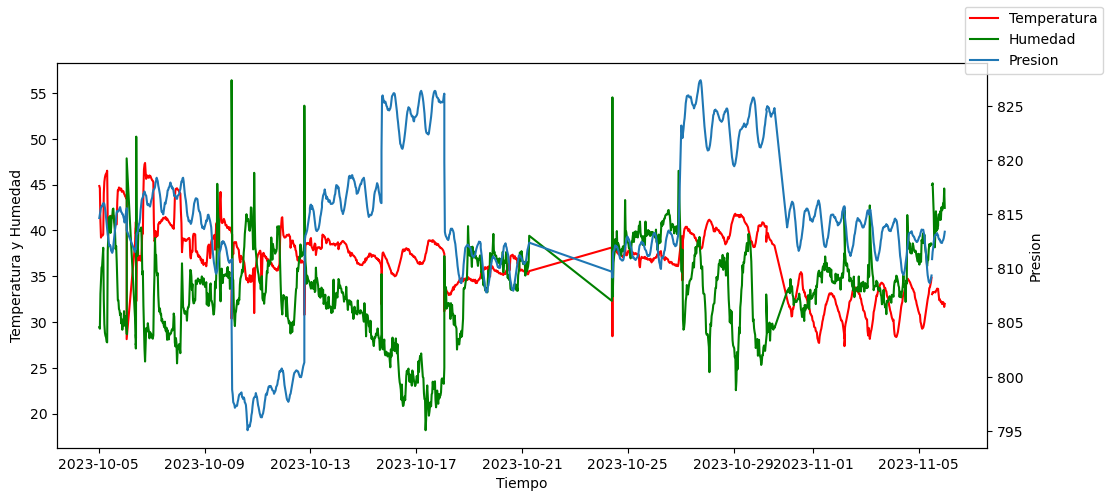

In [8]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Temperatura y Humedad")
ax1.plot(tiempo, datafull[" Temperatura"], label="Temperatura", color="r")
ax1.plot(tiempo, datafull["Humedad"], label="Humedad", color="g")
ax2=ax1.twinx()
ax2.set_ylabel("Presion")
ax2.plot(tiempo, datafull ["Presion"],label="Presion")
datafull["Presion"].interpolate(method='polynomial', order=2, inplace=True)
datafull["Humedad"].interpolate(method='polynomial', order=2, inplace=True)
datafull[" Temperatura"].interpolate(method='polynomial', order=2, inplace=True)
fig.legend()

In [18]:
Val=datafull["Presion"].mean()
datafull["Presion"].fillna(value=Val, inplace=True)

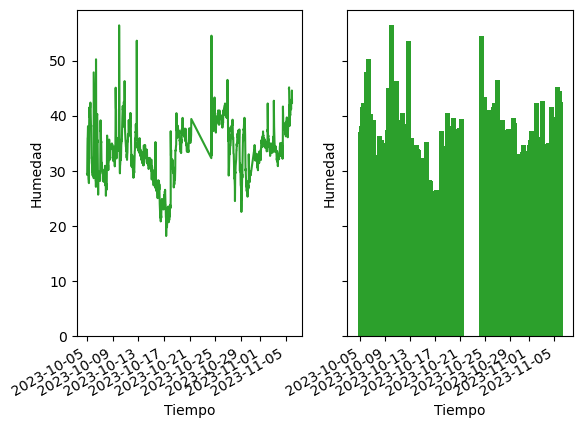

In [12]:
fig, ax = plt.subplots(1,2, sharey = True)
ax[0].plot(tiempo,datafull['Humedad'], color = 'tab:green')
ax[1].bar(tiempo,datafull['Humedad'],color = 'tab:green')
ax[0].set_ylabel("Humedad")
ax[0].set_xlabel("Tiempo")
ax[1].set_ylabel("Humedad")
ax[1].set_xlabel("Tiempo")
datafull["Humedad"].interpolate(method='polynomial', order=2, inplace=True)
fig.autofmt_xdate()
plt.show()


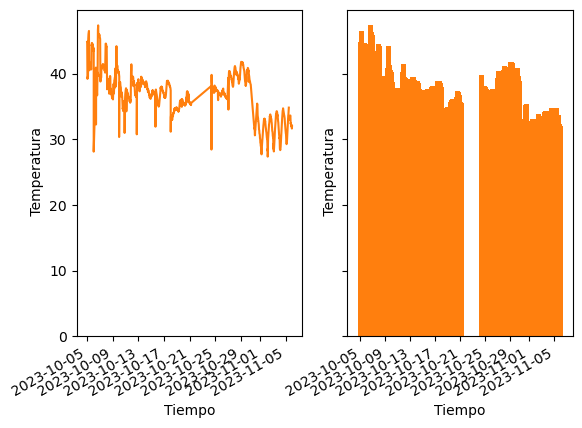

In [44]:
fig, ax1 = plt.subplots(1,2, sharey = True)
ax1[0].plot(tiempo,datafull[' Temperatura'], color = 'tab:orange')
ax1[1].bar(tiempo,datafull[' Temperatura'],color = 'tab:orange')
ax1[0].set_ylabel(" Temperatura")
ax1[0].set_xlabel("Tiempo")
ax1[1].set_ylabel(" Temperatura")
ax1[1].set_xlabel("Tiempo")
datafull["Presion"].interpolate(method='polynomial', order=2, inplace=True)
fig.autofmt_xdate()
plt.show()


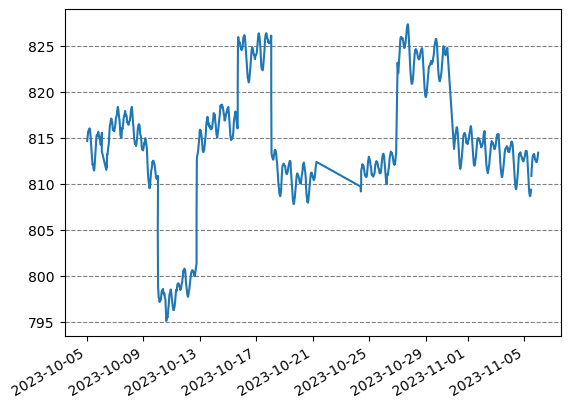

In [45]:
fig, ax3 = plt.subplots()
ax3.plot(tiempo, datafull['Presion'], color = 'tab:blue')
ax3.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
fig.autofmt_xdate()
plt.show()
